In [1]:
import os
from osgeo import gdal

In [2]:
#Define input and output folders

input_dir = "Z:/BuildingDetection/downloaded_jp2_less"  # Path to raw jp2 files
output_dir = "Z:/BuildingDetection/dopJP2_to_tiff_2"  # Path to save output tiff files

os.makedirs(output_dir, exist_ok=True)  # Create the output folder if it doesn't exist

In [3]:
gdal.AllRegister()  # Register all available drivers
drivers = [gdal.GetDriver(i).ShortName for i in range(gdal.GetDriverCount())]
print("JP2OpenJPEG" in drivers)  # Should print True if the driver is available

True


In [4]:
# Loop through JP2 files in the input directory
for file_name in os.listdir(input_dir):
    if file_name.endswith(".jp2"):  # Check for JP2 files
        input_path = os.path.join(input_dir, file_name)
        output_path = os.path.join(output_dir, file_name.replace(".jp2", ".tiff"))
        
        try:
            # Open the JP2 file
            dataset = gdal.Open(input_path)
            
            if not dataset:
                print(f"Error: Could not open {input_path}")
                continue
            
            # Convert and save as TIFF
            gdal.Translate(output_path, dataset, format="GTiff")
            print(f"Converted: {file_name} to {output_path}")
        except Exception as e:
            print(f"Failed to process {file_name}: {e}")

print("Batch processing complete!")

C:\Users\Ochwada\anaconda3\envs\geo_ai\Lib\site-packages\osgeo\gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Converted: dop10rgbi_32_280_5652_1_nw_2023.jp2 to Z:/BuildingDetection/dopJP2_to_tiff_2\dop10rgbi_32_280_5652_1_nw_2023.tiff
Converted: dop10rgbi_32_280_5653_1_nw_2023.jp2 to Z:/BuildingDetection/dopJP2_to_tiff_2\dop10rgbi_32_280_5653_1_nw_2023.tiff
Converted: dop10rgbi_32_280_5654_1_nw_2023.jp2 to Z:/BuildingDetection/dopJP2_to_tiff_2\dop10rgbi_32_280_5654_1_nw_2023.tiff
Converted: dop10rgbi_32_280_5655_1_nw_2023.jp2 to Z:/BuildingDetection/dopJP2_to_tiff_2\dop10rgbi_32_280_5655_1_nw_2023.tiff
Converted: dop10rgbi_32_280_5656_1_nw_2023.jp2 to Z:/BuildingDetection/dopJP2_to_tiff_2\dop10rgbi_32_280_5656_1_nw_2023.tiff
Converted: dop10rgbi_32_280_5657_1_nw_2023.jp2 to Z:/BuildingDetection/dopJP2_to_tiff_2\dop10rgbi_32_280_5657_1_nw_2023.tiff
Converted: dop10rgbi_32_280_5658_1_nw_2023.jp2 to Z:/BuildingDetection/dopJP2_to_tiff_2\dop10rgbi_32_280_5658_1_nw_2023.tiff
Converted: dop10rgbi_32_280_5659_1_nw_2023.jp2 to Z:/BuildingDetection/dopJP2_to_tiff_2\dop10rgbi_32_280_5659_1_nw_2023.tiff


In [5]:

import matplotlib.pyplot as plt

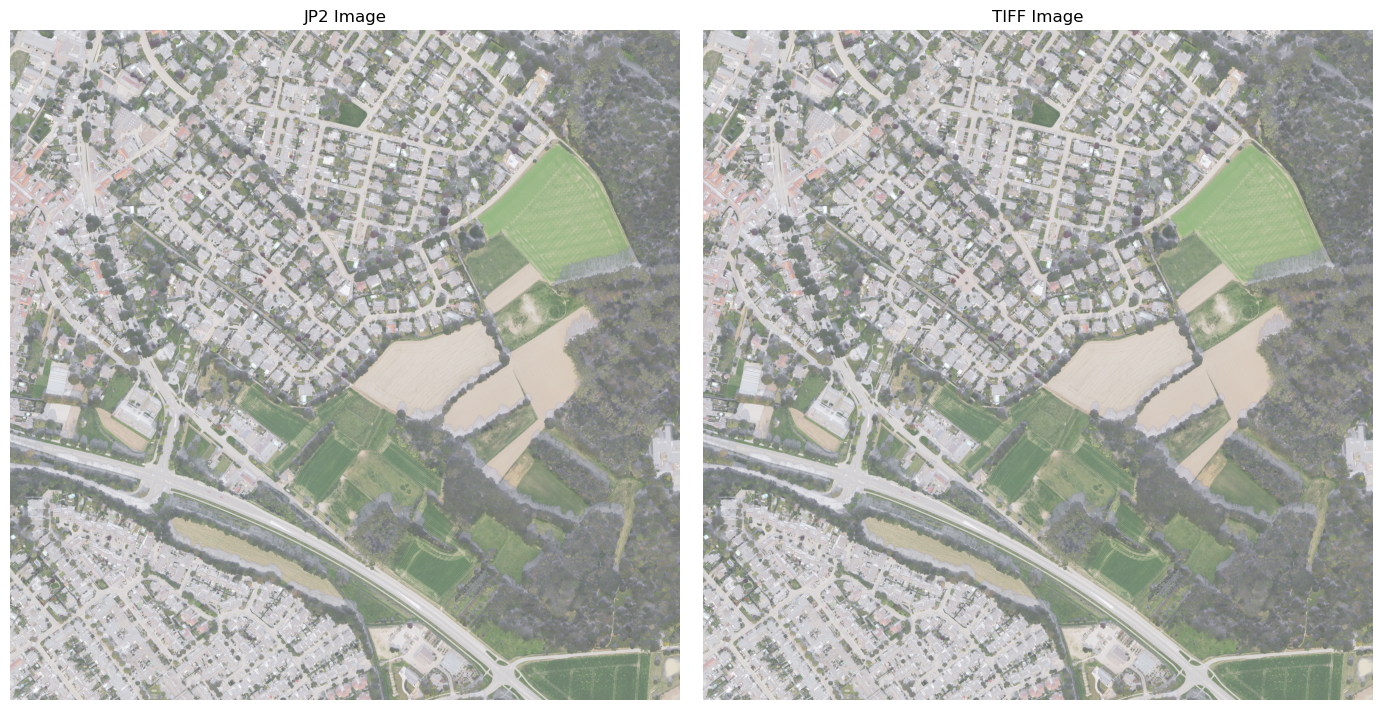

In [6]:
def visualize_images_gdal(jp2_path, tiff_path):
    # Open JP2 and TIFF files with GDAL
    jp2_dataset = gdal.Open(jp2_path)
    tiff_dataset = gdal.Open(tiff_path)

    # Read raster data
    jp2_image = jp2_dataset.ReadAsArray().transpose(1, 2, 0)  # Rearrange dimensions
    tiff_image = tiff_dataset.ReadAsArray().transpose(1, 2, 0)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    # Display JP2 image
    axes[0].imshow(jp2_image)
    axes[0].set_title("JP2 Image")
    axes[0].axis("off")

    # Display TIFF image
    axes[1].imshow(tiff_image)
    axes[1].set_title("TIFF Image")
    axes[1].axis("off")

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Paths to files
jp2_file = "Z:/BuildingDetection/downloaded_jp2_less/dop10rgbi_32_280_5652_1_nw_2023.jp2"
tiff_file = "Z:/BuildingDetection/dopJP2_to_tiff_2/dop10rgbi_32_280_5652_1_nw_2023.tiff"

# Visualize
visualize_images_gdal(jp2_file, tiff_file)


In [7]:
# Open JP2 and get CRS
jp2_dataset = gdal.Open(jp2_file)
jp2_crs = jp2_dataset.GetProjection()
print(f"JP2 CRS: {jp2_crs}")

# Open TIFF and get CRS
tiff_dataset = gdal.Open(tiff_file)
tiff_crs = tiff_dataset.GetProjection()
print(f"TIFF CRS: {tiff_crs}")

JP2 CRS: PROJCS["ETRS89 / UTM zone 32N",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","25832"]]
TIFF CRS: PROJCS["ETRS89 / UTM zone 32N",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_M